In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("elapsed_time.csv").drop(["include_drift", "base_model", "total_elapsed_time"], axis=1)
datasets = df["dataset"].unique()
OTHERS_METRICS_NAME = "OtherMetrics"
df = df.rename(columns={"StatsMetrics": OTHERS_METRICS_NAME})
df.head()

,dataset,OtherMetrics,ClusteringMetrics,PsiCalculator,DomainClassifier,OmvPht,SqsiCalculator,Udetector
0,electricity,125.598835,383.291589,32.353272,109.184740,1.315249,98.953155,99.524062
1,powersupply,408.707691,849.802683,143.491268,836.556444,127.990890,456.614052,675.065398
2,rialto,1244.481237,2006.593794,202.293485,2081.398998,59.596963,1084.418978,1384.442907
3,airlines,221.193420,1702.335396,49.795456,882.318559,4.294247,192.799894,160.180601


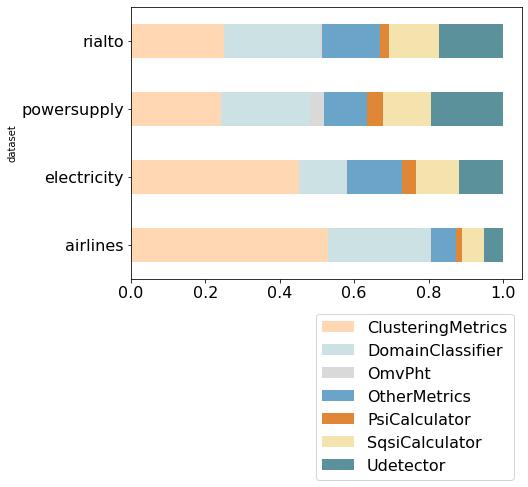

In [20]:
COLORS = [
    "#ffd7b3", # orange
    "#cce1e4", # green
    "#d9d9d9", # grey
    "#6aa4c8ff", # blue
    "#E08637", # dark orange
    "#F5E3AD", # yellow
    "#5B919A", # dark green
    ]

grouped_df = df.groupby("dataset").mean()
grouped_df = grouped_df.reindex(sorted(grouped_df.columns), axis=1)
grouped_df = grouped_df.div(grouped_df.sum(axis=1), axis=0)
grouped_df.plot.barh(figsize=(7, 5), fontsize=16, color=COLORS, stacked=True).legend(loc='best', prop={'size': 16}, bbox_to_anchor=(1, -0.1))

In [5]:
new_vs_old = pd.DataFrame()
new_vs_old["existing_MFe"] = grouped_df[OTHERS_METRICS_NAME] + grouped_df["ClusteringMetrics"]
new_vs_old["all_MFe"] = grouped_df[OTHERS_METRICS_NAME] + grouped_df["ClusteringMetrics"] + grouped_df["PsiCalculator"] + grouped_df["DomainClassifier"] + grouped_df["OmvPht"] + grouped_df["SqsiCalculator"] + grouped_df["Udetector"]
new_vs_old["all_MFe_without_dc"] = grouped_df[OTHERS_METRICS_NAME] + grouped_df["ClusteringMetrics"] + grouped_df["PsiCalculator"] + grouped_df["OmvPht"] + grouped_df["SqsiCalculator"] + grouped_df["Udetector"]
new_vs_old

,existing_MFe,all_MFe,all_MFe_without_dc
dataset,,,
airlines,1923.528816,3212.917573,2330.599015
electricity,508.890424,850.220902,741.036162
powersupply,1258.510374,3498.228426,2661.671982
rialto,3251.075031,8063.226362,5981.827364


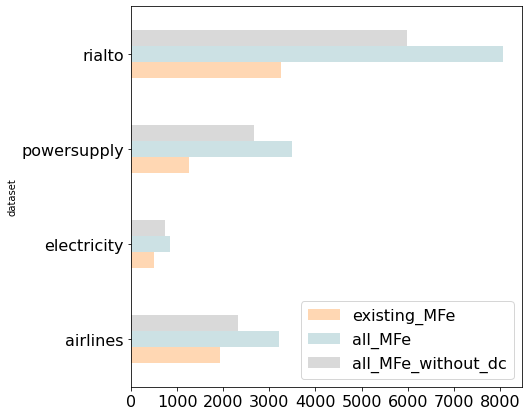

In [6]:
new_vs_old.plot.barh(figsize=(7,7), fontsize=16, color=COLORS).legend(loc='best', prop={'size': 16})

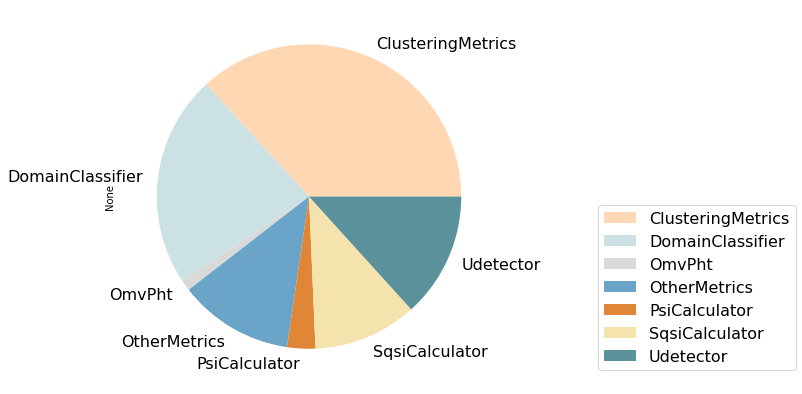

In [33]:
grouped_df.mean().plot.pie(
    figsize=(20,7),
    fontsize=16,
    colors=COLORS,
    ).legend(loc='upper right', prop={'size': 16}, bbox_to_anchor=(1.8, 0.5))

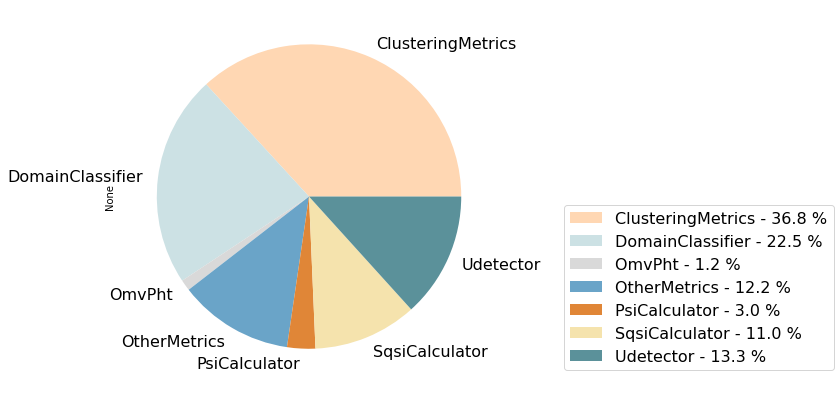

In [36]:
x = grouped_df.columns
y = grouped_df.mean()
porcent = 100.*y/y.sum()
labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(x, porcent)]

y.plot.pie(
    figsize=(20,7),
    fontsize=16,
    colors=COLORS,
).legend(labels, loc='upper right', prop={'size': 16}, bbox_to_anchor=(1.9, 0.5))